In [53]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

import numpy as np

PLAN:
Use historical data to fine-tune parameters for baseline model (with both WWI and Spanish Flu)
Use Modified data (Linear fit for life expectancy and birth rate, removing data points from 1910-1920) to generate a control model without the war or flu
Isolate effects of WWI and Spanish flu by increasing death rates / decreasing birth rates within different age groups for each respective event

In [71]:
#population of italy (millions) 1900 to 1949 
#http://www.populstat.info/Europe/italyc.htm
T_START = 1900
T_END = 1949
pop_data = [32.4750, 32.0454, 32.5956, 32.9612, 33.2183, 
       33.4761, 33.7332, 33.6407, 33.9098, 34.2698,
       34.5652, 35.1318, 35.2390, 35.5978, 36.1201,
       36.5464, 36.6024, 36.5829, 36.3700, 37.8370,
       38.7560, 38.7900, 39.1360, 39.4010, 39.6930,
       39.5846, 39.6810, 40.0540, 40.4450, 40.7030,
       41.1767, 41.5800, 41.9300, 41.8060, 42.2170,
       42.4446, 43.5780, 43.8430, 44.3940, 43.7870,
       44.8300, 45.3870, 48.8300, 44.9400, 45.4150, 
       45.3800, 45.7200, 46.3810, 46.7330, 46.1040]

#life expectancy data
#https://en.wikipedia.org/wiki/Demographics_of_Italy
lifexp_data = [43.5, 43.0, 43.1, 44.4, 43.9, 45.2, 45.4, 43.1, 44.6, 46.7,
          44.7, 48.9, 48.4, 49.9, 42.5, 39.6, 38.1, 25.8, 42.3, 45.5,
          49.2, 50.0, 51.4, 51.5, 51.3, 50.9, 52.5, 52.6, 52.3, 55.2,
          54.8, 54.7, 56.3, 56.8, 56.2, 56.7, 55.5, 56.1, 57.6, 57.0,
          54.7, 52.5, 49.4, 52.4, 54.9, 59.0, 61.2, 63.4, 64.1, 65.8]

#birthrate data
birth_data = [33.0, 32.5, 33.3, 31.6, 32.7, 32.4, 31.8, 31.3, 33.3, 32.4,
              32.9, 31.2, 32.2, 31.8, 31.2, 30.6, 24.2, 19.6, 18.2, 21.6, 
              32.2, 30.7, 30.8, 29.9, 28.9, 28.2, 27.7, 27.4, 26.6, 25.6,
              26.7, 24.8, 23.8, 23.8, 23.5, 23.4, 22.4, 22.9, 23.8, 23.6, 
              23.5, 20.9, 20.5, 19.8, 18.3, 18.2, 23.0, 22.2, 21.8, 20.1]

y = [1900., 1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908.,
     1909., 1910., 1911., 1912., 1913., 1914., 1915., 1916., 1917.,
     1918., 1919., 1920., 1921., 1922., 1923., 1924., 1925., 1926.,
     1927., 1928., 1929., 1930., 1931., 1932., 1933., 1934., 1935.,
     1936., 1937., 1938., 1939., 1940., 1941., 1942., 1943., 1944.,
     1945., 1946., 1947., 1948., 1949.]


[1900.0,
 1901.0,
 1902.0,
 1903.0,
 1904.0,
 1905.0,
 1906.0,
 1907.0,
 1908.0,
 1909.0,
 1910.0,
 1911.0,
 1912.0,
 1913.0,
 1914.0,
 1915.0,
 1916.0,
 1917.0,
 1918.0,
 1919.0,
 1920.0,
 1921.0,
 1922.0,
 1923.0,
 1924.0,
 1925.0,
 1926.0,
 1927.0,
 1928.0,
 1929.0,
 1930.0,
 1931.0,
 1932.0,
 1933.0,
 1934.0,
 1935.0,
 1936.0,
 1937.0,
 1938.0,
 1939.0,
 1940.0,
 1941.0,
 1942.0,
 1943.0,
 1944.0,
 1945.0,
 1946.0,
 1947.0,
 1948.0,
 1949.0]

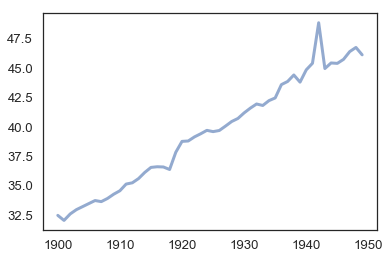

In [72]:
#plot italy pop data
plot(y,pop_data)

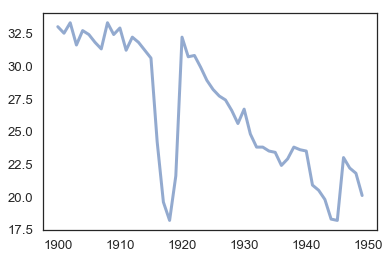

In [73]:
#plot italy life expectancy data
plot(y,birth_data)

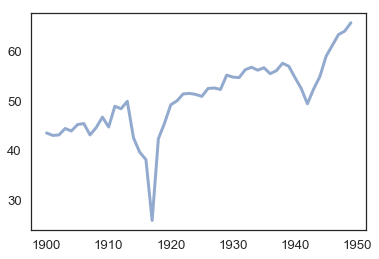

In [74]:
#plot italy birthrate data
plot(y,lifexp_data)

Life expectancy =  0.4121520257938937  * year -  740.7973427424291


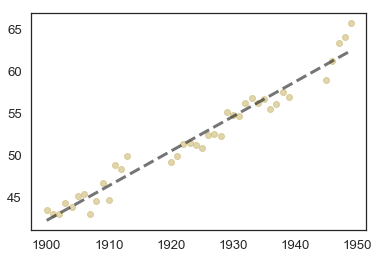

In [76]:
#to get a baseline life expectancy (no disease or war)
#eliminate data points that exhibit a drop

modlifexp = [43.5, 43.0, 43.1, 44.4, 43.9, 45.2, 45.4, 43.1, 44.6, 46.7,
          44.7, 48.9, 48.4, 49.9, 
          49.2, 50.0, 51.4, 51.5, 51.3, 50.9, 52.5, 52.6, 52.3, 55.2,
          54.8, 54.7, 56.3, 56.8, 56.2, 56.7, 55.5, 56.1, 57.6, 57.0,
                                        59.0, 61.2, 63.4, 64.1, 65.8]

modt_lifexp = [1900., 1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908.,
     1909., 1910., 1911., 1912., 1913., 1920., 1921., 1922., 1923., 1924., 1925., 1926.,
     1927., 1928., 1929., 1930., 1931., 1932., 1933., 1934., 1935.,
     1936., 1937., 1938., 1939., 1945., 1946., 1947., 1948., 1949.]

#assume linear increase of life expectancy
m1,b1 = np.polyfit(modt_lifexp, modlifexp, 1) 

plot(modt_lifexp,modlifexp, 'yo')
t = linspace(T_START, T_END, T_END - T_START + 1)
plot(t, m1*t+b1, '--k') 
print('Life expectancy = ',m1,' * year - ', -b1)

#From linear life expectancy...
#Dramatically drop life expectancy/birthrate in different age groups over a short period of time
#To Isolate effects of disesase/war

Birthrate =  -0.00030174404652519716  * year -  -0.6080990867915439


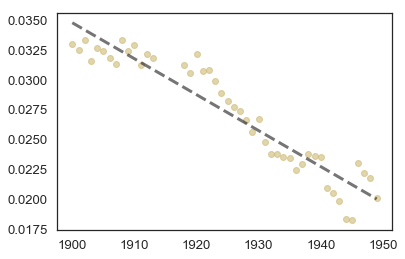

In [78]:
#to get a baseline birthrate (no disease or war)
#eliminate data points that exhibit a drop

modbirthdata = [33.0, 32.5, 33.3, 31.6, 32.7, 32.4, 31.8, 31.3, 33.3, 32.4,
              32.9, 31.2, 32.2, 31.8, 31.2, 30.6,  
              32.2, 30.7, 30.8, 29.9, 28.9, 28.2, 27.7, 27.4, 26.6, 25.6,
              26.7, 24.8, 23.8, 23.8, 23.5, 23.4, 22.4, 22.9, 23.8, 23.6, 
              23.5, 20.9, 20.5, 19.8, 18.3, 18.2, 23.0, 22.2, 21.8, 20.1]

modbirth = [b/1000 for b in modbirthdata]

modt_birth = [1900., 1901., 1902., 1903., 1904., 1905., 1906., 1907., 1908.,
     1909., 1910., 1911., 1912., 1913., 
     1918., 1919., 1920., 1921., 1922., 1923., 1924., 1925., 1926.,
     1927., 1928., 1929., 1930., 1931., 1932., 1933., 1934., 1935.,
     1936., 1937., 1938., 1939., 1940., 1941., 1942., 1943., 1944.,
     1945., 1946., 1947., 1948., 1949.]

#assume linear decrease of birthrate
m2,b2 = np.polyfit(modt_birth, modbirth, 1) 

plot(modt_birth,modbirth, 'yo')
plot(t, m2*t+b2, '--k') 
print('Birthrate = ',m2,' * year - ', -b2)

In [85]:
#young 0-15
#mid 16-39
#old 40-life expectancy

#Mature rate young to mid
MATURE1 = 1/16
#Mature rate mid to old
MATURE2 = 1/24
#death = 1/(lifexp[t]-40)

#ASSUMPTION: Each Age is equally likely

p_0 = pop[0]
yng_0 = p_0 * 1/(MATURE1*42)
mid_0 = p_0 * 1/(MATURE2*42)
old_0 = p_0 * 2/42


lifexp = TimeSeries()
for t in linrange(T_START, T_END):
        lifexp[t] = m1*(t) + b1
        
birthrate = TimeSeries()
for t in linrange(T_START, T_END):
        birthrate[t] = m2*(t) + b2

In [42]:
#TIMESTEP

#delta young = young pop*MATURE1
#delta mid = mid pop*MATURE2
#delta old = old pop * death[t]
#Young population increases by pop*birthrate[t]
#delta young moves from young to mid
#delta mid moves from mid to old
#old decreases by delta old
#pop = young plus old plus mid

In [81]:
help(TimeSeries())

Help on TimeSeries in module modsim object:

class TimeSeries(ModSimSeries)
 |  Represents a mapping from times to values.
 |  
 |  Method resolution order:
 |      TimeSeries
 |      ModSimSeries
 |      pandas.core.series.Series
 |      pandas.core.base.IndexOpsMixin
 |      pandas.core.generic.NDFrame
 |      pandas.core.base.PandasObject
 |      pandas.core.base.StringMixin
 |      pandas.core.accessor.DirNamesMixin
 |      pandas.core.base.SelectionMixin
 |      builtins.object
 |  
 |  Methods inherited from ModSimSeries:
 |  
 |  __copy__(self, deep=True)
 |  
 |  __init__(self, *args, **kwargs)
 |      Initialize a Series.
 |      
 |      Note: this cleans up a weird Series behavior, which is
 |      that Series() and Series([]) yield different results.
 |      See: https://github.com/pandas-dev/pandas/issues/16737
 |  
 |  copy = __copy__(self, deep=True)
 |  
 |  set(self, **kwargs)
 |      Uses keyword arguments to update the Series in place.
 |      
 |      Example: serie

In [1]:
print('hi')

hi
